In [6]:
#Boiler Plate for GPU Testing on Google Colab platform
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Aug 18 23:29:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
#Library required to divide the dataset
pip install split-folders
pip install Augmentor
import splitfolders
import augmentor

In [8]:
from logging import warning
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from glob import glob
from datetime import datetime
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import tensorflow as tf
print("success")

success


In [9]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras import optimizers
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [25]:
img_width, img_height = 224, 224

In [26]:
# Importing model
base_model=ResNet50(weights=None, pooling='avg', include_top=False, input_shape=(img_width, img_height, 3))

In [27]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [28]:
for layer in base_model.layers:
    layer.trainable = True

In [29]:
last_layer = base_model.get_layer('conv5_block3_out')
print(last_layer.output_shape)

(None, 7, 7, 2048)


In [30]:
x = Flatten()(last_layer.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation = 'softmax')(x)
model = Model(base_model.input, x)

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [32]:
optimizer = Adam(learning_rate=2e-8)
model.compile(optimizer='adam' , loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#Will require access authentication for a google account
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
classes = {'COVID':0, 'Viral Pneumonia': 1, 'Lung Opacity': 2, 'Normal': 3}

In [ ]:
#Divding the dataset into Training and Testing folders
#File Division
#input_folder = '/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset'
#splitfolders.ratio(input_folder, output = "/content/drive/MyDrive/Colab Notebooks/SharedData",
#		seed=42, ratio=(0.75,0,0.25),
#	move=False, group_prefix=None)


In [34]:
#Defining Directories
folders=glob('/content/drive/MyDrive/Colab Notebooks/SharedData')
train_path = '/content/drive/MyDrive/Colab Notebooks/SharedData/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/SharedData/test'

In [35]:
#Traning and validation data generation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    vertical_flip=True,
    samplewise_std_normalization=False)

validation_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    vertical_flip=True,
    samplewise_std_normalization=False)

In [ ]:
#p=Augmentor.Pipeline(r"path")
#p.zoom(probability=0.3, min_factor=0.8, max_factor=1.2)
#p.flip_top_bottom(probability=0.5)
#p.random_brightness(probability=0.5, min_factor=0.3,max_factor=1.2)
#p.random_distortion(probability=0.0, grid_width=4, grid_height=4, magnitude=0) 
#p.sample(100000)

In [36]:

training_set = train_datagen.flow_from_directory(train_path,
                                                 color_mode='grayscale',
                                                 target_size = (img_width, img_height),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = validation_datagen.flow_from_directory(test_path,
                                                        color_mode='grayscale',
                                                        target_size = (img_width, img_height),
                                                        batch_size = 32,
                                                        class_mode = 'categorical'
                                                        )

Found 15891 images belonging to 4 classes.
Found 5298 images belonging to 4 classes.


In [66]:
start = datetime.now()

history = model.fit(training_set, 
                    steps_per_epoch=50, 
                    epochs = 20, 
                    verbose= 1,
                    validation_data = validation_set, 
                    validation_steps = 5)

duration=datetime.now() - start
print ("Total Training Time: ", duration )

Epoch 1/20
50/50 [==============================] - 29s 577ms/step - loss: 0.7087 - accuracy: 0.7188 - val_loss: 0.7603 - val_accuracy: 0.6750
Epoch 2/20
50/50 [==============================] - 25s 495ms/step - loss: 0.7149 - accuracy: 0.7284 - val_loss: 0.6493 - val_accuracy: 0.7563
Epoch 3/20
50/50 [==============================] - 26s 515ms/step - loss: 0.6822 - accuracy: 0.7278 - val_loss: 0.6150 - val_accuracy: 0.7375
Epoch 4/20
50/50 [==============================] - 26s 510ms/step - loss: 0.7611 - accuracy: 0.6956 - val_loss: 0.7036 - val_accuracy: 0.7500
Epoch 5/20
50/50 [==============================] - 27s 530ms/step - loss: 0.7110 - accuracy: 0.7056 - val_loss: 0.6477 - val_accuracy: 0.7188
Epoch 6/20
50/50 [==============================] - 26s 510ms/step - loss: 0.6984 - accuracy: 0.7375 - val_loss: 0.8484 - val_accuracy: 0.7375
Epoch 7/20
50/50 [==============================] - 25s 490ms/step - loss: 0.7123 - accuracy: 0.7225 - val_loss: 0.7229 - val_accuracy: 0.7437

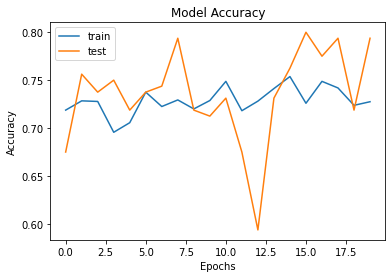

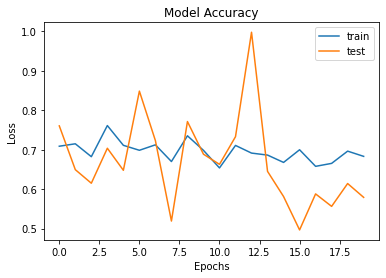

In [67]:
from keras.metrics import accuracy
# Graph Generation based on the epoch history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

print(" ")

plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
#Saving the Model and creating the array file
model.save("ResNet50.h5")
np.save('ResNet50.npy', classes)
print("Mode and array saved")

Mode and array saved
